# Neural Networks with keras and tensorflow

N.B. You will need to pip install keras and tensorflow!

## Diabetes Solution

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
from keras.models import Sequential
from keras.layers import Dense
import warnings
warnings.filterwarnings('ignore')

In [6]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

ss = StandardScaler()


In [7]:
import pandas as pd
df = pd.read_csv('https://query.data.world/s/hbvdf6y2dqlpzjsc5ho5yboxy3tz7l')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [9]:
df.shape

(768, 9)

In [10]:
df_num= df.to_numpy()

In [11]:
X_data = df_num[:,0:-1]
Y_data= df_num[:,-1]

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X_data, Y_data,test_size=.2)

In [13]:
ss.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [14]:
X_train = ss.transform(X_train)
X_test = ss.transform(X_test)

In [34]:
model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

#activation='sigmoid'
model.compile(optimizer='rmsprop',
              loss= 'binary_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 12)                108       
_________________________________________________________________
dense_17 (Dense)             (None, 8)                 104       
_________________________________________________________________
dense_18 (Dense)             (None, 1)                 9         
Total params: 221
Trainable params: 221
Non-trainable params: 0
_________________________________________________________________


In [35]:
training_history = model.fit(X_train, y_train, epochs=50, 
                             verbose=1, batch_size=10 , 
                             validation_data=(X_test, y_test))

Train on 614 samples, validate on 154 samples
Epoch 1/50
614/614 [==============================] - 0s 293us/step - loss: 0.6630 - accuracy: 0.6059 - val_loss: 0.6118 - val_accuracy: 0.6818
Epoch 2/50
614/614 [==============================] - 0s 84us/step - loss: 0.6064 - accuracy: 0.6857 - val_loss: 0.5566 - val_accuracy: 0.7468
Epoch 3/50
614/614 [==============================] - 0s 77us/step - loss: 0.5677 - accuracy: 0.7150 - val_loss: 0.5176 - val_accuracy: 0.7597
Epoch 4/50
614/614 [==============================] - 0s 74us/step - loss: 0.5400 - accuracy: 0.7215 - val_loss: 0.4920 - val_accuracy: 0.7662
Epoch 5/50
614/614 [==============================] - 0s 73us/step - loss: 0.5230 - accuracy: 0.7378 - val_loss: 0.4743 - val_accuracy: 0.7662
Epoch 6/50
614/614 [==============================] - 0s 73us/step - loss: 0.5109 - accuracy: 0.7459 - val_loss: 0.4672 - val_accuracy: 0.7727
Epoch 7/50
614/614 [==============================] - 0s 72us/step - loss: 0.5008 - accuracy: 0

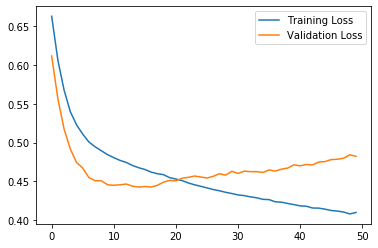

In [36]:
train_loss = training_history.history['loss']
test_loss = training_history.history['val_loss']
plt.plot(train_loss, label='Training Loss')
plt.plot(test_loss, label='Validation Loss')
plt.legend()

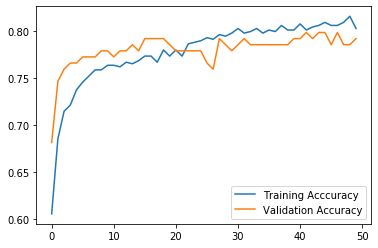

In [37]:
train_loss = training_history.history['accuracy']
test_loss = training_history.history['val_accuracy']
plt.plot(train_loss, label='Training Acccuracy')
plt.plot(test_loss, label='Validation Accuracy')
plt.legend()

In [38]:
from sklearn.datasets import load_breast_cancer
from matplotlib import pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

For this lesson we'll use sklearn's built-in breast cancer dataset. The next cell loads the data and prints the data description.

In [39]:
data = load_breast_cancer()
print(data.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

In [40]:
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target)

ss = StandardScaler()
ss.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [41]:
X_train_scaled = ss.transform(X_train)
X_test_scaled = ss.transform(X_test)

In [42]:
X_train_scaled.shape

(426, 30)

## Constructing a Neural Network in Keras

In [43]:
# Importing model and layer types

from keras.models import Sequential
from keras.layers import Dense

# Importing our optimizer

from keras.optimizers import Adam

In [44]:
model = Sequential()

inputs = X_train.shape[1]
hiddens = inputs

model.add(Dense(hiddens, input_dim=inputs, activation='relu'))
model.add(Dense(1))

In [51]:
adam = Adam()
model.compile(optimizer=adam, loss='mean_squared_error', metrics=['accuracy'])

In [58]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test),
         epochs=50, batch_size=32)

Train on 426 samples, validate on 143 samples
Epoch 1/50
426/426 [==============================] - 0s 34us/step - loss: 0.7245 - accuracy: 0.5305 - val_loss: 0.8539 - val_accuracy: 0.6434
Epoch 2/50
426/426 [==============================] - 0s 29us/step - loss: 0.6129 - accuracy: 0.5469 - val_loss: 1.0390 - val_accuracy: 0.4266
Epoch 3/50
426/426 [==============================] - 0s 47us/step - loss: 1.1836 - accuracy: 0.4296 - val_loss: 5.1136 - val_accuracy: 0.1189
Epoch 4/50
426/426 [==============================] - 0s 39us/step - loss: 1.7256 - accuracy: 0.2981 - val_loss: 1.2094 - val_accuracy: 0.3776
Epoch 5/50
426/426 [==============================] - 0s 34us/step - loss: 1.6972 - accuracy: 0.3380 - val_loss: 1.0152 - val_accuracy: 0.6084
Epoch 6/50
426/426 [==============================] - 0s 37us/step - loss: 0.7769 - accuracy: 0.5516 - val_loss: 1.3665 - val_accuracy: 0.5385
Epoch 7/50
426/426 [==============================] - 0s 38us/step - loss: 0.6478 - accuracy: 0.

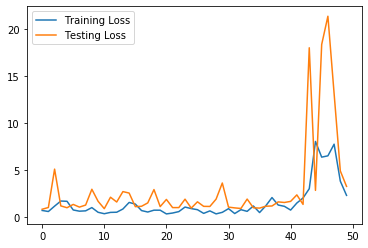

In [59]:
train_loss = history.history['loss']
test_loss = history.history['val_loss']
plt.plot(train_loss, label='Training Loss')
plt.plot(test_loss, label='Testing Loss')
plt.legend()

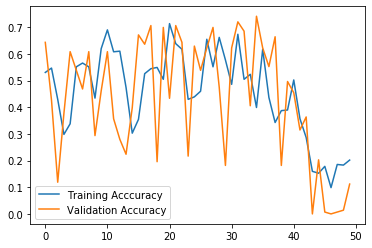

In [60]:
train_loss = history.history['accuracy']
test_loss = history.history['val_accuracy']
plt.plot(train_loss, label='Training Acccuracy')
plt.plot(test_loss, label='Validation Accuracy')
plt.legend()

In [61]:
np.hstack([model.predict(X_test), y_test.reshape(143, 1)])[:20]

array([[ 0.26945543,  1.        ],
       [-0.84955549,  1.        ],
       [-0.16496991,  1.        ],
       [ 0.11111118,  1.        ],
       [-0.12464093,  1.        ],
       [ 0.57185793,  1.        ],
       [-0.5802989 ,  1.        ],
       [-0.08599041,  1.        ],
       [-0.21965741,  1.        ],
       [-0.2640872 ,  1.        ],
       [-0.50133085,  1.        ],
       [-1.89733839,  0.        ],
       [-1.56152296,  0.        ],
       [-1.36212873,  0.        ],
       [ 0.0947137 ,  1.        ],
       [-2.61131239,  0.        ],
       [-4.38333845,  0.        ],
       [-2.4982295 ,  0.        ],
       [-0.79936934,  1.        ],
       [-1.7434535 ,  0.        ]])

In [62]:
model.evaluate(X_test, y_test)

143/143 [==============================] - 0s 26us/step


[3.282207725764988, 0.1118881106376648]

## Constructing a Neural Network in ("Base") Tensorflow

## You don't need this bit --> this is literally just here to show you that it would be less intuitive to do it in TF and to encourage you to stick to Keras.

In [9]:
import tensorflow as tf

In [13]:
var_1 = tf.Variable(3)
var_2 = tf.Variable(2)

var_3 = var_1 * var_2
var_4 = var_1 + var_3 * var_2

In [15]:
init = tf.global_variables_initializer()

with tf.Session() as sess:
    init.run()
    result = sess.run(var_4)

In [16]:
print(result)

15


In [39]:
X_train_scaled.shape

(426, 30)

In [45]:
tf.reset_default_graph()

X = tf.placeholder(dtype=tf.float32, shape=(None, 30))
y = tf.placeholder(dtype=tf.float32, shape=(None, 1))

hid = tf.layers.dense(X, 30, activation=tf.nn.relu)
y_hat = tf.layers.dense(hid, 1, activation=tf.nn.sigmoid)

loss = tf.losses.log_loss(y, y_hat)
optimizer = tf.train.AdamOptimizer(0.01)
training_run = optimizer.minimize(loss)

saver = tf.train.Saver()

In [48]:
init = tf.global_variables_initializer()

with tf.Session() as sess:
    init.run()
    
    for _ in range(100):
        sess.run(training_run, feed_dict={X: X_train_scaled, y: y_train.reshape(-1, 1)})
        
    pred = sess.run(y_hat, feed_dict={X: X_test})

classes = (pred > 0.5).astype(int)

metrics.accuracy_score(y_test.reshape(-1, 1), classes)

0.34965034965034963